In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd D:\apps\aml-transaction-monitoring-master

D:\apps\aml-transaction-monitoring-master


In [3]:
param_file = 'params/HKG.json'

In [4]:
import pandas as pd

def load_kpis_results(filename):
    df = pd.read_csv(filename, sep=';')
    df['Noise reduction'] = (df['S-B+L1']+df['S-B+N']-df['S+B-L1']-df['S+B-N'])/(df['S-B+L1']+df['S-B+N']+df['S+B+L1']+df['S+B+N'])
    df['L2+ Recall'] = (df['S+B+L2+']/(df['S+B+L2+']+df['S-B+L2+']))
    df['L3 Recall'] = (df['S+B+L3']/(df['S+B+L3']+df['S-B+L3']))
    return df

In [5]:
from aml_transaction_monitoring import constants, Parameters
params = Parameters.from_file(param_file, {
            "EXPERIMENT_KEY" : "",
            "PIPELINE_STEPS" : {}})

2022-05-19 15:48:34,118|WARNING:Loaded logging configuration from D:\apps\aml-transaction-monitoring-master\aml_transaction_monitoring\utils\logging.yml


0it [00:00, ?it/s]


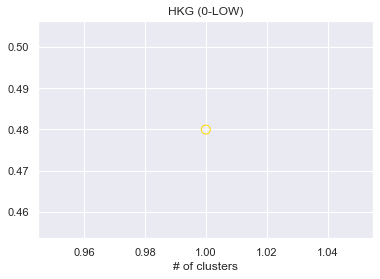

   gmm  n_clusters  gmm * n_clusters ↑  noise reduction ↓
0    1           1                   1           0.479973
__________________________________________________


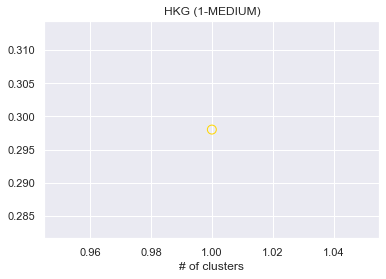

   gmm  n_clusters  gmm * n_clusters ↑  noise reduction ↓
0    1           1                   1           0.298017
__________________________________________________


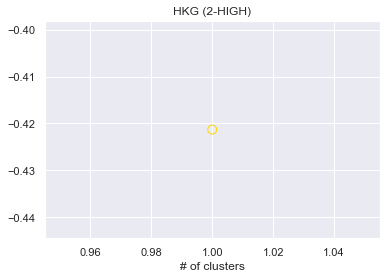

   gmm  n_clusters  gmm * n_clusters ↑  noise reduction ↓
0    1           1                   1           -0.42131
__________________________________________________


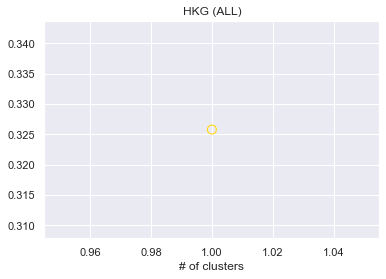

   gmm  n_clusters  gmm * n_clusters ↑  noise reduction ↓
0    1           1                   1            0.32576
__________________________________________________


In [6]:
import os
import matplotlib.pyplot as plt

from step2a_run0_clustering_gridsearch import GMM_COMPONENTS, CLUSTERS_NUM

colors = ['blue', 'orange', 'green', 'red', 'magenta', 'olive', 'skyblue', 'gold']

for risk in ['0-LOW', '1-MEDIUM', '2-HIGH', 'ALL']:
    noise_reduction_stats = []
    for gmm in GMM_COMPONENTS:
        for nclusters in CLUSTERS_NUM:
            key = f'run0_cluster_{gmm}_{nclusters}'
            file_kpis = os.path.join(constants.READ_WRITE_DATA_PATH(),
                                        params.BU,
                                        "kpis",
                                        f"hit_kpis_{key}_{risk}_truth.csv")
            if not os.path.exists(file_kpis):
                continue
            
            df_kpis = load_kpis_results(file_kpis)
            plt.scatter(
                [gmm * nclusters],
                [df_kpis.loc[0, 'Noise reduction']], s=20*2**(gmm+1),
                marker='o', c='None', edgecolors=colors[nclusters-2]
            )
            noise_reduction_stats.append([gmm, nclusters, gmm * nclusters, df_kpis.loc[0, 'Noise reduction']])

    plt.xlabel('# of clusters')
    plt.title(f"{params.BU} ({risk})")
    plt.show()
    df = pd.DataFrame(noise_reduction_stats, columns=['gmm', 'n_clusters', 'gmm * n_clusters ↑', 'noise reduction ↓'])
    print(df.sort_values(['noise reduction ↓', 'gmm * n_clusters ↑'], ascending=[False, True]).head())
    print('_'*50)
